<a href="https://colab.research.google.com/github/Thanveerahmedshaik/MachineLearning/blob/main/Logistic_regression_using_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
X, y = make_classification(n_samples=100, n_features= 2, n_informative = 1 ,n_redundant = 0, n_classes = 2,
                          n_clusters_per_class =1 , random_state= 41, hypercube = False,class_sep = 20)

In [78]:
import matplotlib.pyplot as plt

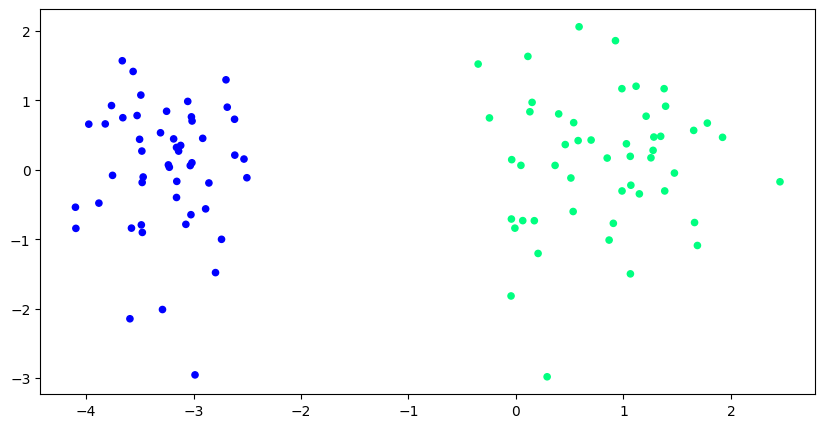

In [79]:
plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1], c = y ,cmap='winter', s=20)
plt.show()

In [80]:
X.shape

(100, 2)

In [81]:
def perceptron(X,y):

  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights))
    weights = weights + lr * (y[j]-y_hat) * X[j]

  return weights[0],weights[1:]

In [82]:
def step(z):
  return 1 if z>0 else 0

In [83]:
intercept,coef  = perceptron(X,y)

In [84]:
print(coef)

[0.98628302 0.45500818]


In [85]:
print(intercept)

1.3000000000000003


Given the standard form of a line:
\begin{align*}
    Ax + By + C &= 0
\end{align*}

 Solve for $y$ to convert it to slope-intercept form ($y = mx + b$):

\begin{align*}
    By &= -Ax - C \quad \text{(Move $Ax$ and $C$ to the right)} \\
    y &= -\frac{A}{B}x - \frac{C}{B} \quad \text{(Divide both sides by $B$)}
\end{align*}

Now, compare with $y = mx + c$ to identify the slope ($m$) and y-intercept ($c$):
\begin{align*}
    \text{Slope (m)} &= -\frac{A}{B} \\
    \text{Intercept (c)} &= -\frac{C}{B}
\end{align*}

In [86]:
m = -(coef[0]/coef[1])
b = -(intercept/coef[1])

In [87]:
print(m)
print(b)

-2.167616010716917
-2.857091482810232


In [88]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

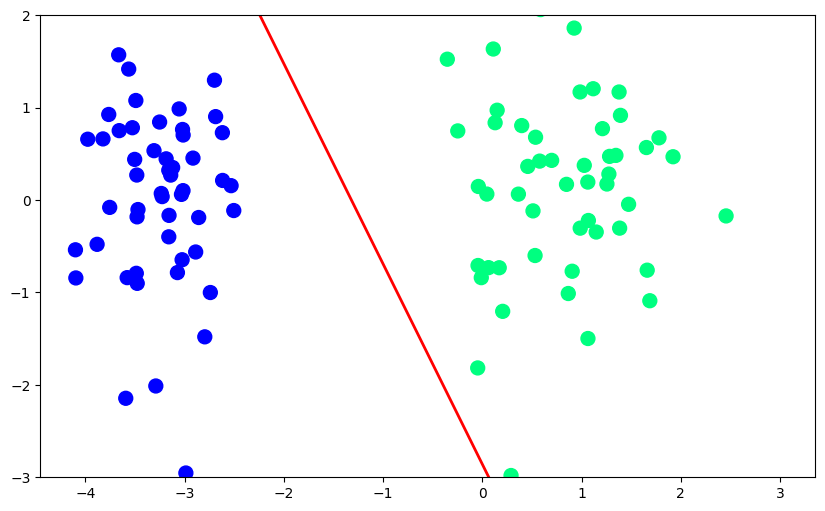

In [89]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=2)
plt.scatter(X[:,0],X[:,1],c=y,cmap = 'winter',s = 100)
plt.ylim(-3,2)

In [90]:
def perceptron_Anime(X,y):
  m = []
  b = []


  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(200):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights))
    weights = weights + lr * (y[j]- y_hat) * X[j]

    m.append(-(weights[1]/weights[2]))
    b.append(-(weights[0]/weights[2]))

  return m,b

In [91]:
m,b = perceptron_Anime(X,y)

In [92]:

from matplotlib import animation
import matplotlib.animation as animation

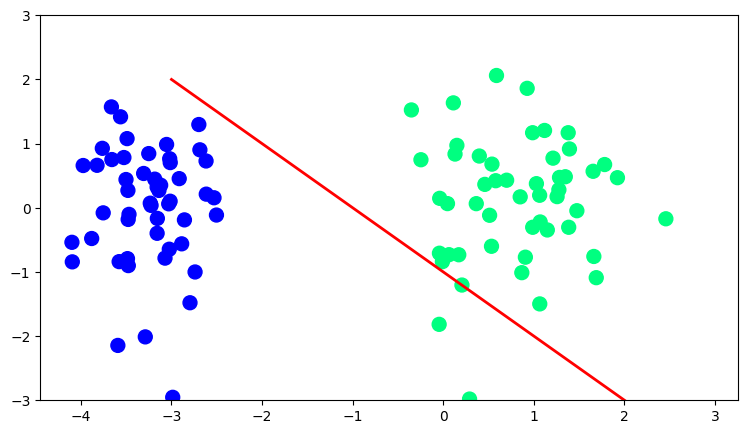

In [93]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    return line, ax

anim = animation.FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
plt.show()


In [94]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

In [95]:
lor.fit(X,y)

LogisticRegression()

In [96]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [97]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 3.0)

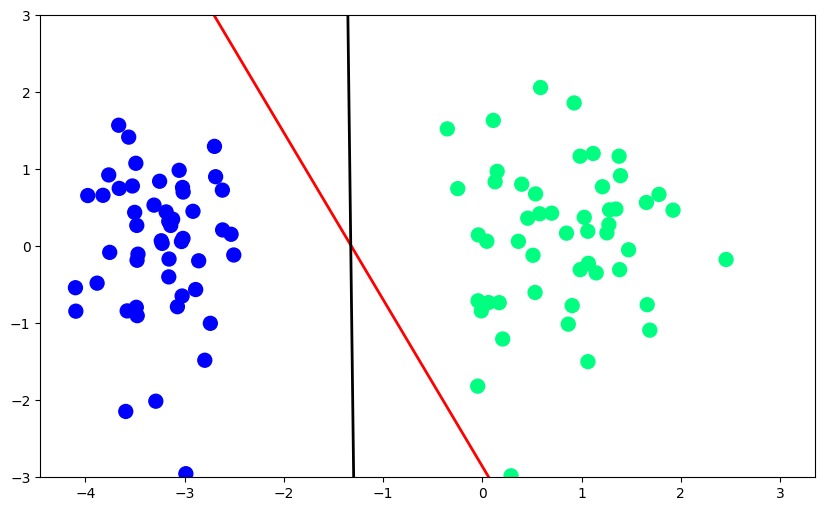

In [98]:
%matplotlib inline
plt.figure(figsize = (10,6))

plt.plot(x_input,y_input,color = 'red',linewidth = 2)
plt.plot(x_input1,y_input1,color='black',linewidth=2)
plt.scatter(X[:,0],X[:,1],c=y,cmap = 'winter', s= 100)
plt.ylim(-3,3)


